In [1]:
import pandas as pd

In [2]:
og_euphoria = pd.read_csv('./dane-od-werki/og_euphoria_sam.csv')
og_euphoria = og_euphoria.iloc[:, 1:]

In [3]:
og_euphoria

,sensorId,cycle_id,cycle_step_id,resistancy_of_sensor,temperature,pressure,relative_humidity
0,1,13,0,994899.187500,31.203724,993.999207,44.829948
1,1,13,1,503317.781250,30.459753,993.932068,45.105705
2,1,13,2,74831.921875,30.723660,993.895813,45.199570
3,1,13,3,58594.644531,31.334421,993.928650,45.330559
4,1,13,4,51240.992188,31.452551,993.918518,45.148808
...,...,...,...,...,...,...,...
5571,8,563,9,31090.599609,43.091057,994.328796,28.072210
5572,8,574,0,18740.849609,43.701649,994.338440,27.148039
5573,8,574,1,13646.055664,43.794235,994.306396,27.032774
5574,8,574,2,79950.031250,44.177109,994.317078,25.342268


In [4]:
x = og_euphoria.loc[(og_euphoria['sensorId'] == 1) & (og_euphoria['cycle_step_id'] == 3)]

In [5]:
x

,sensorId,cycle_id,cycle_step_id,resistancy_of_sensor,temperature,pressure,relative_humidity
3,1,13,3,58594.644531,31.334421,993.928650,45.330559
13,1,21,3,48558.421875,31.935129,993.919189,44.626270
23,1,25,3,52794.390625,32.480549,993.952148,43.752323
33,1,33,3,53489.343750,32.985756,993.983521,42.998093
43,1,37,3,53489.343750,33.483421,994.010864,42.336037
...,...,...,...,...,...,...,...
873,1,542,3,62408.582031,42.431858,994.006165,28.942238
883,1,547,3,62683.644531,42.441910,994.011475,28.926167
893,1,554,3,62362.972656,42.459507,993.995056,28.854139
903,1,559,3,62500.000000,42.467049,994.306519,28.826517


In [6]:
features = x.iloc[:, 3:]

In [7]:
features

,resistancy_of_sensor,temperature,pressure,relative_humidity
3,58594.644531,31.334421,993.928650,45.330559
13,48558.421875,31.935129,993.919189,44.626270
23,52794.390625,32.480549,993.952148,43.752323
33,53489.343750,32.985756,993.983521,42.998093
43,53489.343750,33.483421,994.010864,42.336037
...,...,...,...,...
873,62408.582031,42.431858,994.006165,28.942238
883,62683.644531,42.441910,994.011475,28.926167
893,62362.972656,42.459507,993.995056,28.854139
903,62500.000000,42.467049,994.306519,28.826517


In [8]:
x = og_euphoria.loc[(og_euphoria['sensorId'] == 1) & (og_euphoria['cycle_step_id'] == 3)]

In [86]:
# obrobienie przykladowej obserwacji dla jednego kanalu
import numpy as np


n = 95 # stala liczba probek



y = np.zeros((8, 4, 10, 95))

for sensorId, df_sensor in og_euphoria.groupby('sensorId'):
    x = np.zeros((4, 10, n))
    for cyclestepId, df_cycle in df_sensor.groupby('cycle_step_id'):
        features = df_cycle.iloc[:, 3:].to_numpy() 
        features = features.T

        # print(features.shape)
        if features.shape[1] < n:
            features = np.pad(features, ((0, 0), (0, n - features.shape[1])), mode='constant', constant_values=0, )

        x[:, cyclestepId, :] = features[:n]


    y[sensorId - 1, :, :, :] = x


In [88]:
y.shape, x.shape

# (8, 4, 10, 95) -> (sensorId, n_features, n_cyclesteps, n_samples)

((8, 4, 10, 95), (4, 10, 95))

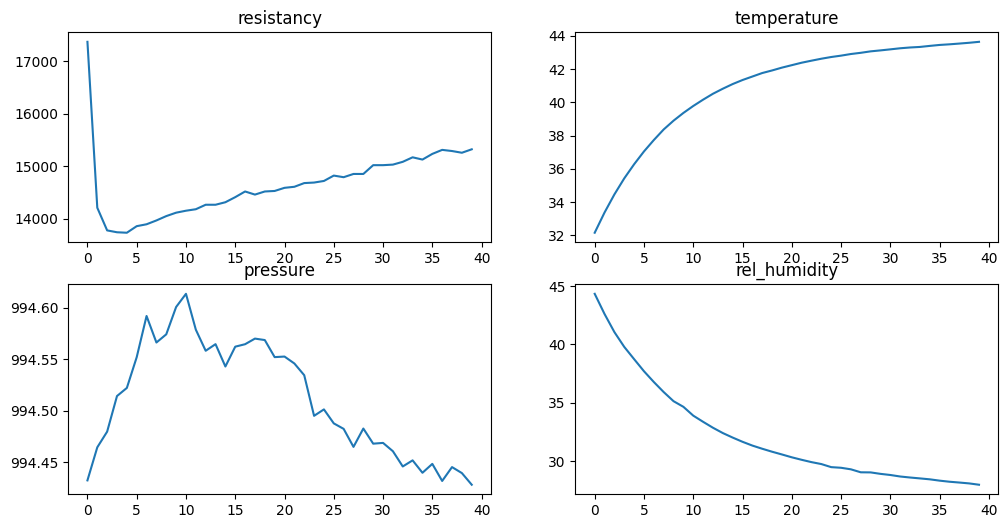

In [89]:
import matplotlib.pyplot as plt

FEATURES = ['resistancy', 'temperature', 'pressure',  'rel_humidity']

fig, axes = plt.subplots(2, 2, figsize = (12, 6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(x[i, 0, :][:40])
    ax.set_title(FEATURES[i])

# ok

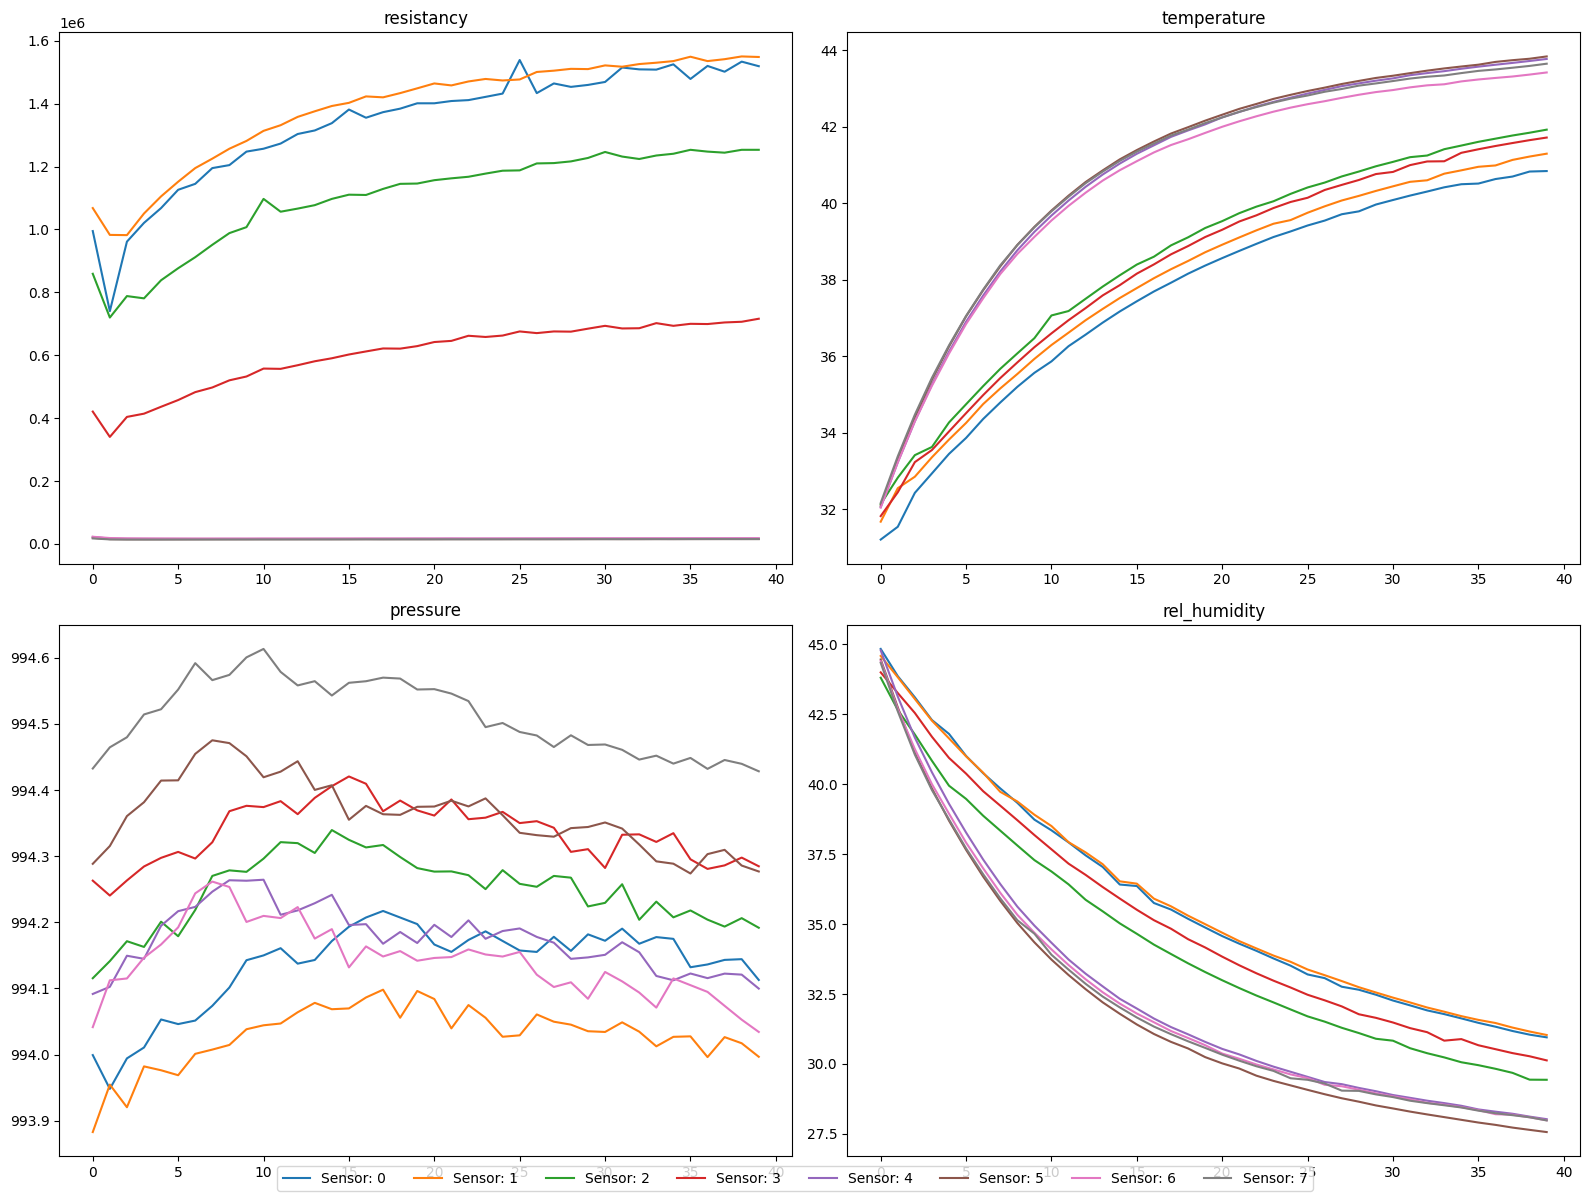

In [107]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for sensor in range(0, 8):
    for i, ax in enumerate(axes):
        ax.plot(y[sensor, i, 0, :40], label=f'Sensor: {sensor}')
        ax.set_title(FEATURES[i])


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 8, labelspacing = 5)

plt.tight_layout()
plt.show()
